In [1]:
#Exploratory Data Analysis on Iris Dataset
#Exploratory Data Analysis (EDA) is a technique to analyze data using some visual Techniques.
#With this technique, we can get detailed information about the statistical summary of the data
#resource: https://www.geeksforgeeks.org/exploratory-data-analysis-on-iris-dataset/
import numpy as np 
import pandas as pd

#method to read csv file from google drive public
url='https://drive.google.com/file/d/1UYBiJOUCeQZoVriIHgdUnmVQiR5h9hQl/view?usp=drive_link'
file_id=url.split('/')[-2]
dwn_url='https://drive.google.com/uc?id=' + file_id
df=pd.read_csv(dwn_url)
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [2]:
#get the shape of the dataset
#df.shape

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [4]:
#The describe() function applies basic statistical computations on the dataset like extreme values, count of data points standard deviation, etc.
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [5]:
#check if our data contains any missing values or not
df.isnull().sum()
#no missing value in dataset

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [6]:
#see if our dataset contains any duplicates or not
data=df.drop_duplicates(subset="Species",)
data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
50,51,7.0,3.2,4.7,1.4,Iris-versicolor
100,101,6.3,3.3,6.0,2.5,Iris-virginica


In [7]:
#see if the dataset is balanced or not i.e. all the species contain equal amounts of rows or not. 
df.value_counts("Species")

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

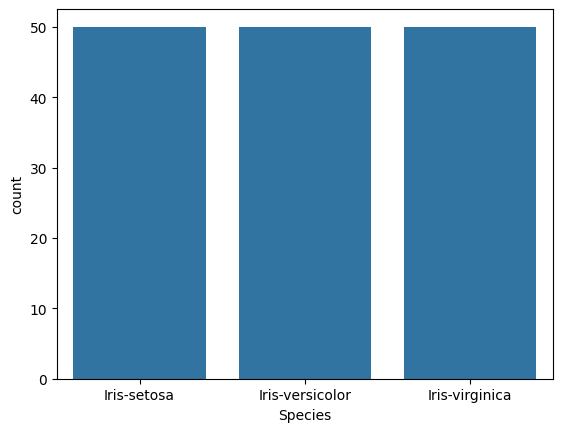

In [8]:
#Visualizing the target column
# importing packages
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='Species',data=df,)
plt.show()

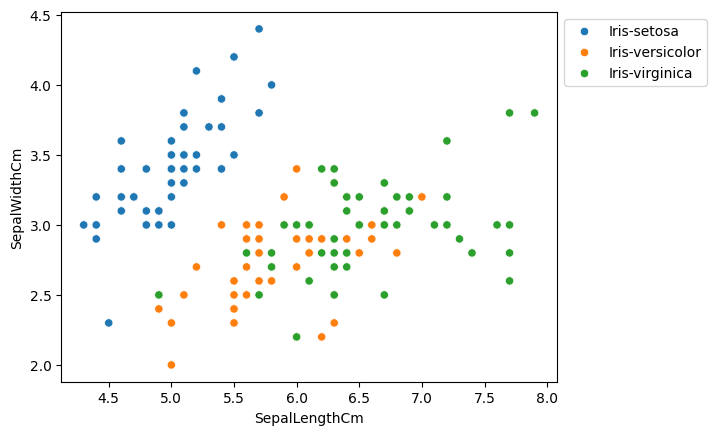

In [9]:
#Example 1: Comparing Sepal Length and Sepal Width
sns.scatterplot(x='SepalLengthCm',y='SepalWidthCm',hue='Species',data=df,)
plt.legend(bbox_to_anchor=(1,1),loc=2)
plt.show()
#belows infers that
#Species Setosa has smaller sepal lengths but larger sepal widths.
#Versicolor Species lies in the middle of the other two species in terms of sepal length and width
#Species Virginica has larger sepal lengths but smaller sepal widths.

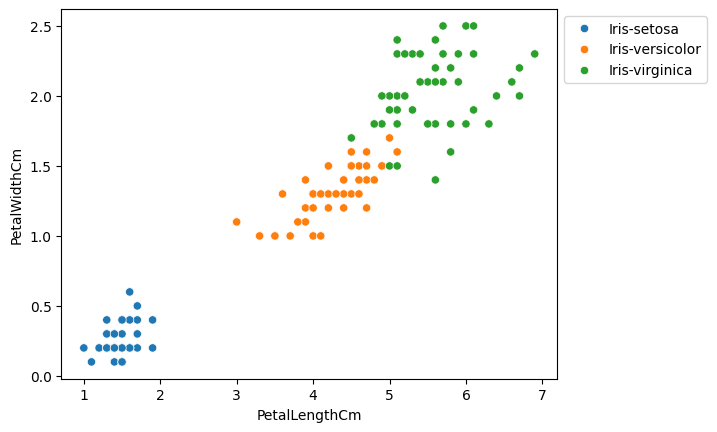

In [10]:
#Comparing Petal Length and Petal Width
sns.scatterplot(x='PetalLengthCm', y='PetalWidthCm', hue='Species', data=df, )
# Placing Legend outside the Figure
plt.legend(bbox_to_anchor=(1, 1), loc=2)
plt.show()

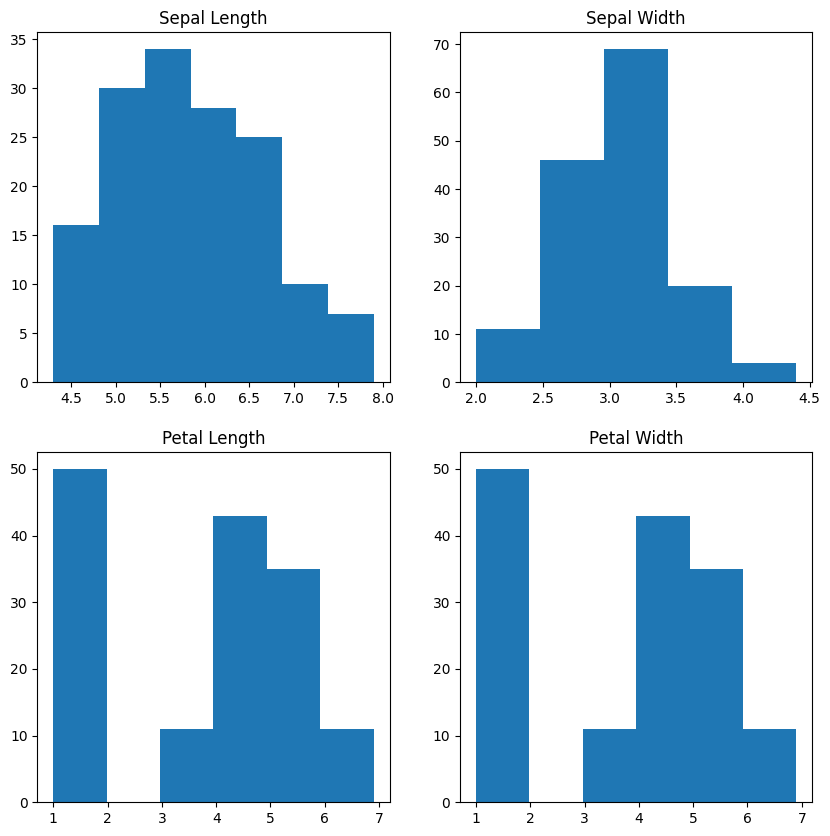

In [11]:
#Histograms allow seeing the distribution of data for various columns.
fig,axes=plt.subplots(2,2,figsize=(10,10))
axes[0,0].set_title("Sepal Length")
axes[0,0].hist(df['SepalLengthCm'], bins=7)

axes[0,1].set_title("Sepal Width")
axes[0,1].hist(df['SepalWidthCm'], bins=5);

axes[1,0].set_title("Petal Length")
axes[1,0].hist(df['PetalLengthCm'], bins=6);

axes[1,1].set_title("Petal Width")
axes[1,1].hist(df['PetalLengthCm'], bins=6);

In [12]:
#Pandas dataframe.corr() is used to find the pairwise correlation of all columns in the dataframe.
data.select_dtypes(include=['number']).corr(method='pearson')

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,1.000000,0.624413,-0.654654,0.969909,0.999685
SepalLengthCm,0.624413,1.000000,-0.999226,0.795795,0.643817
SepalWidthCm,-0.654654,-0.999226,1.000000,-0.818999,-0.673417
PetalLengthCm,0.969909,0.795795,-0.818999,1.000000,0.975713
PetalWidthCm,0.999685,0.643817,-0.673417,0.975713,1.000000


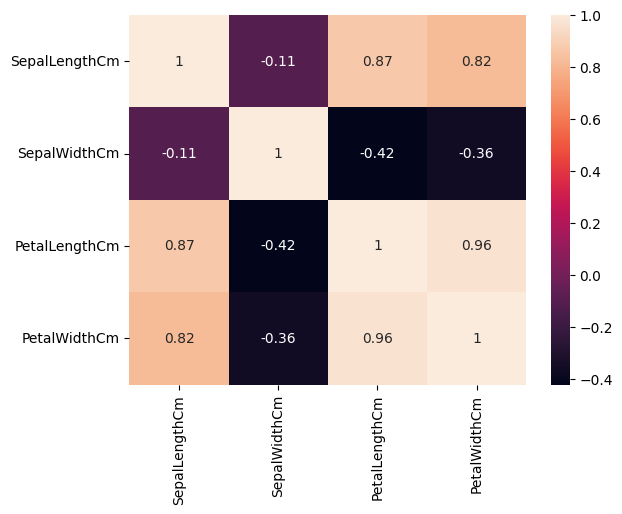

In [13]:
#The heatmap is a data visualization technique that is used to analyze the dataset as colors in two dimensions
sns.heatmap(df.select_dtypes(include=['number']).corr(method='pearson').drop(['Id'], axis=1).drop(['Id'], axis=0),annot = True); 
plt.show()
#we can see that –
#Petal width and petal length have high correlations. 
#Petal length and sepal Length have good correlations.
#Petal Width and Sepal length have good correlations.

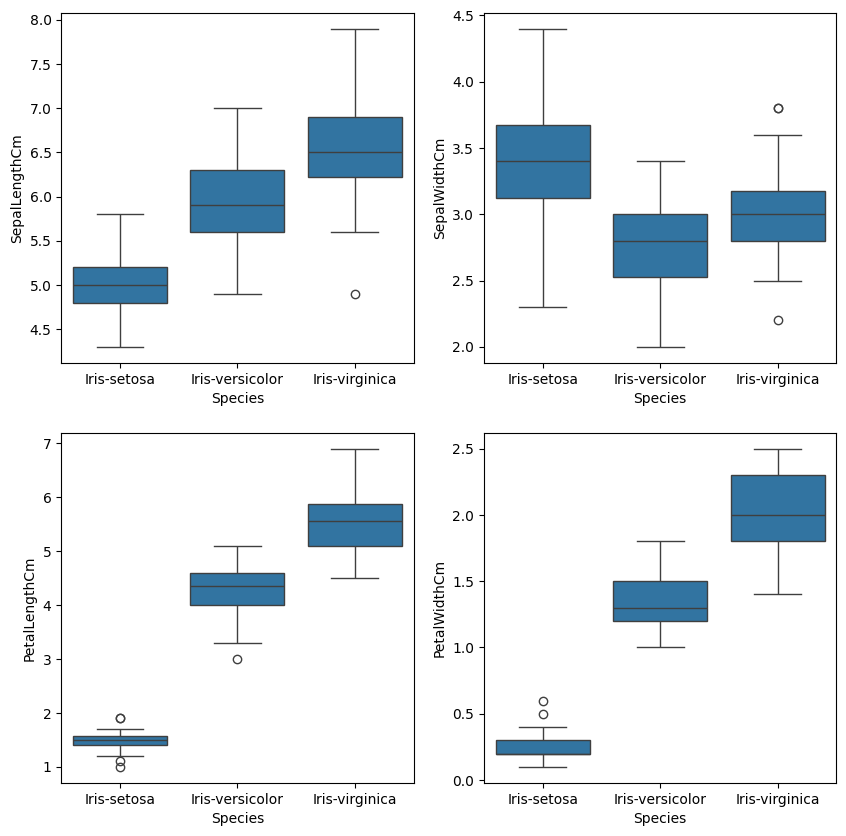

In [14]:
#use boxplots to see how the categorical value os distributed with other numerical values
def graph(y):
    sns.boxplot(x="Species", y=y, data=df)

plt.figure(figsize=(10,10))
# Adding the subplot at the specified
# grid position
plt.subplot(221)
graph('SepalLengthCm')

plt.subplot(222)
graph('SepalWidthCm')

plt.subplot(223)
graph('PetalLengthCm')

plt.subplot(224)
graph('PetalWidthCm')

#plt.show()

<Axes: xlabel='SepalWidthCm'>

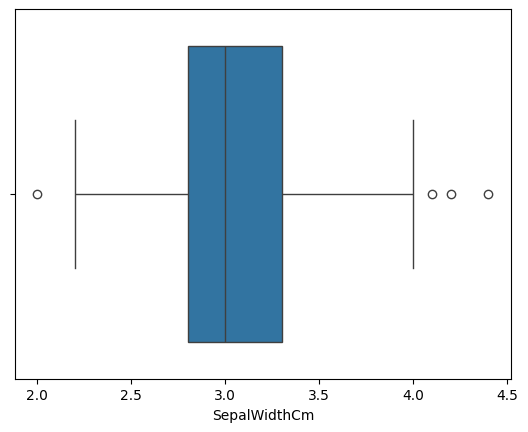

In [15]:
#Handling Outliers
#An Outlier is a data-item/object that deviates significantly from the rest of the (so-called normal)objects.
sns.boxplot(x='SepalWidthCm', data=df)
#the values above 4 and below 2 are acting as outliers

Old Shape:  (150, 6)
New Shape:  (146, 6)


<Axes: xlabel='SepalWidthCm'>

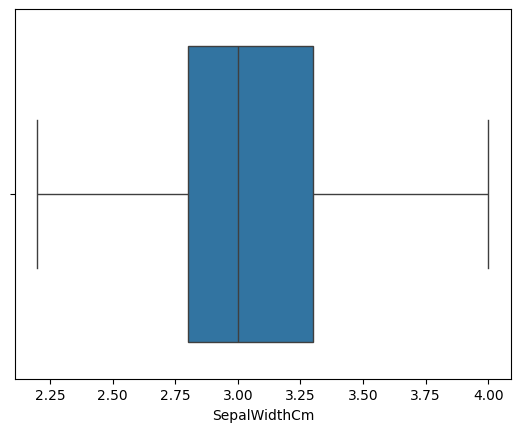

In [16]:
#For removing the outlier, one must follow the same process of removing an entry from the dataset
#using its exact position in the dataset
import numpy as np

# Load the dataset 
df = pd.read_csv('Iris.csv') 

# IQR 
Q1 = np.percentile(df['SepalWidthCm'], 25, method = 'midpoint') 
Q3 = np.percentile(df['SepalWidthCm'], 75, method = 'midpoint') 
IQR = Q3 - Q1 
print("Old Shape: ", df.shape) 

# Upper bound 
upper = np.where(df['SepalWidthCm'] >= (Q3+1.5*IQR))
# Lower bound 
lower = np.where(df['SepalWidthCm'] <= (Q1-1.5*IQR))

# Removing the Outliers 
df.drop(upper[0], inplace = True) 
df.drop(lower[0], inplace = True) 

print("New Shape: ", df.shape)
sns.boxplot(x='SepalWidthCm', data=df)